In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [3]:
path = "/kaggle/input/giasmp/GiaSMP.csv"
data = pd.read_csv(path, encoding="latin-1",sep=";")
data

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [4]:
msv = 2151260829
col1 = msv % 16 + 1
col2 = col1 + 1
col3 = col2 + 1

# Chuyển đổi chỉ số cột thành chuỗi
columns = [str(col1), str(col2), str(col3)]

# Chọn các cột cần thiết và sao chép để tránh cảnh báo SettingWithCopyWarning
data_8_9 = data[columns].copy()

# Thêm cột 'date' từ cột ngày tháng (đảm bảo tên cột đúng)
# Giả sử cột ngày tháng có thể là 'Ngày' hoặc 'date'
if 'Ngày' in data.columns:
    data_8_9['date'] = data['Ngày']
elif 'date' in data.columns:
    data_8_9['date'] = data['date']
else:
    print("Không tìm thấy cột ngày tháng.")

# Hiển thị 5 hàng đầu tiên của dataframe mới
print(data_8_9.head(5))

       14      15      16        date
0   964.4   964.4   964.4  01/01/2021
1  1019.7  1019.7  1019.7  01/02/2021
2   988.4   988.4   988.4  01/03/2021
3  1010.8  1010.8  1010.8  01/04/2021
4  1061.5  1061.5  1061.5  01/05/2021


In [7]:
time_series = data.drop(columns=['Ngày']).values

In [8]:
# Khởi tạo mô hình HMM với số lượng trạng thái ẩn 
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

In [9]:
# Huấn luyện mô hình HMM
model.fit(time_series)

GaussianHMM(n_components=3, n_iter=1000)

In [10]:
# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 10

In [11]:
# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_values = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_values = model.sample(1)[0]
    predictions.append(next_values[0])
    last_values = next_values

In [12]:
# Chuyển đổi danh sách các dự báo thành mảng numpy
predictions = np.array(predictions)

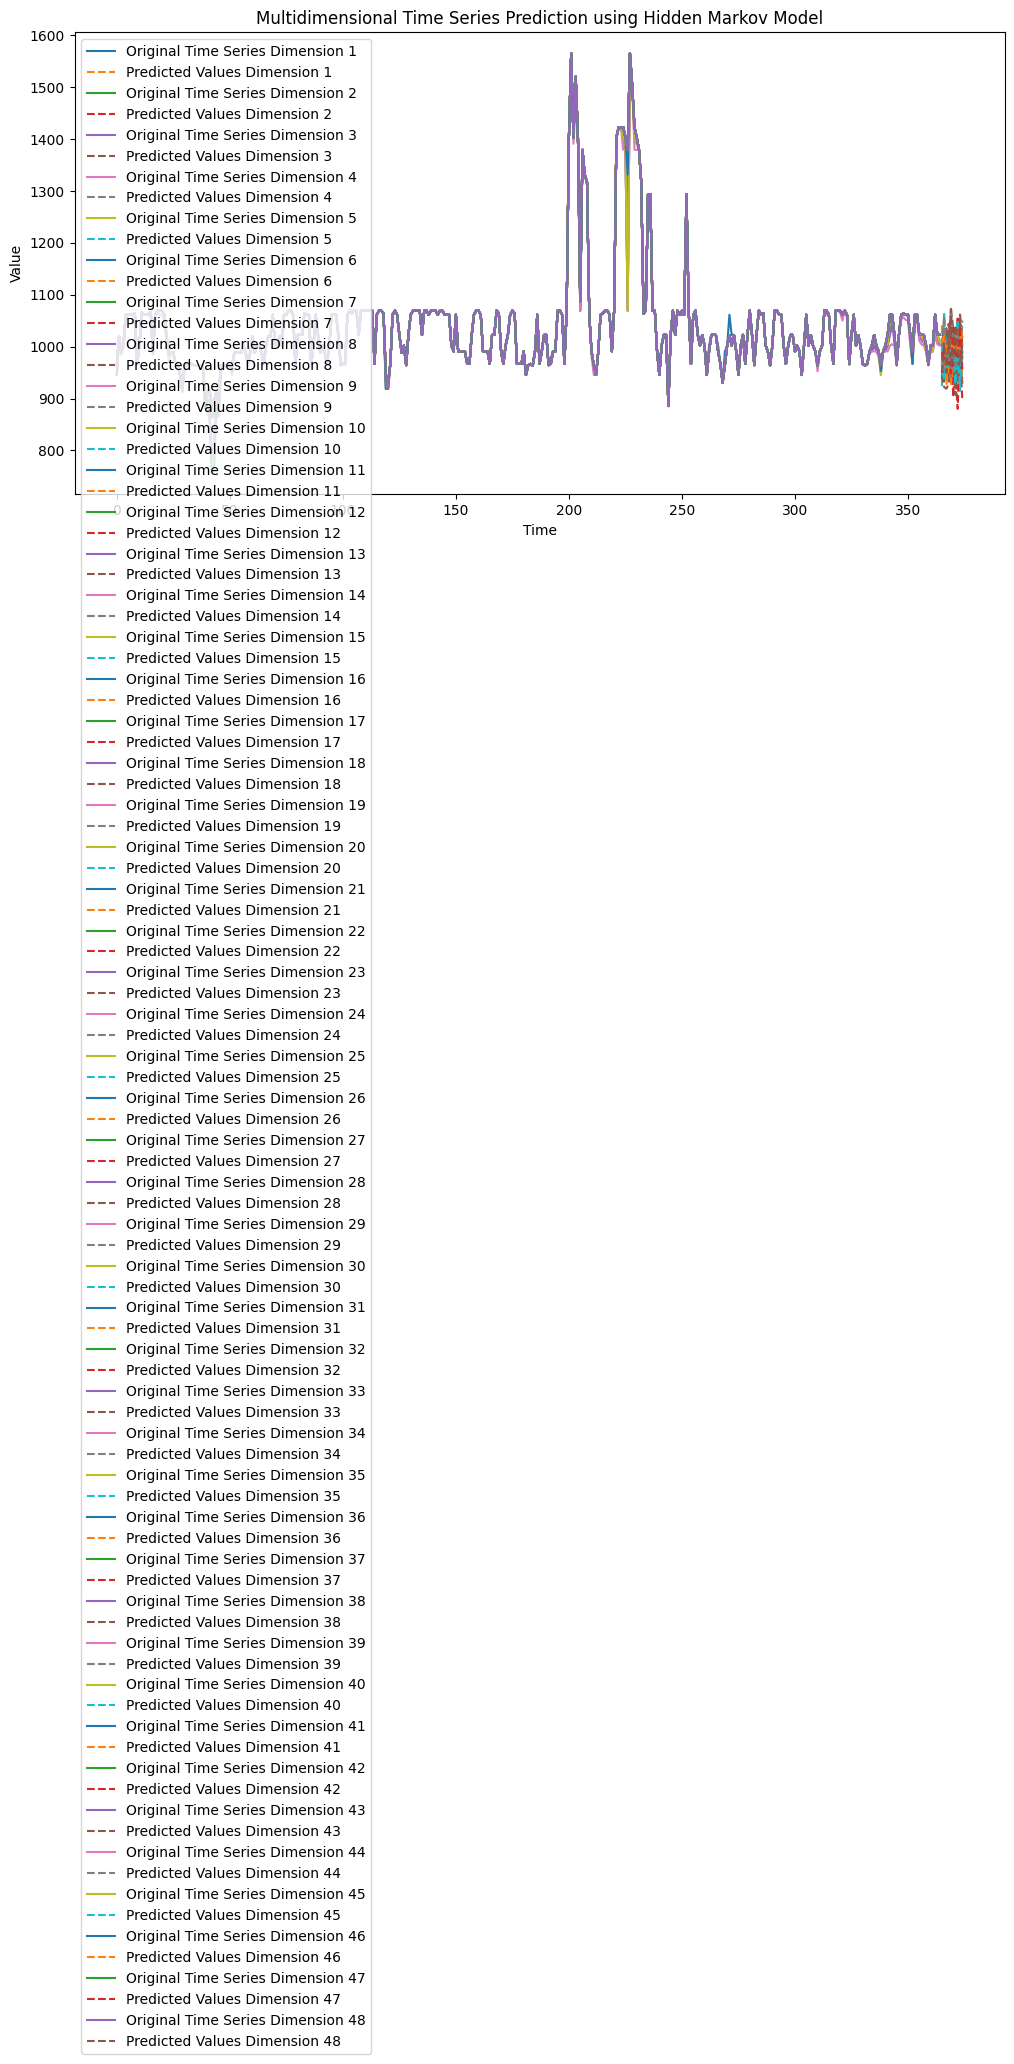

In [13]:
# Vẽ biểu đồ chuỗi thời gian gốc và giá trị dự báo cho từng chiều
plt.figure(figsize=(12, 6))
for i in range(time_series.shape[1]):
    plt.plot(range(len(time_series)), time_series[:, i], label=f"Original Time Series Dimension {i+1}")
    plt.plot(range(len(time_series), len(time_series) + n_steps), predictions[:, i], label=f"Predicted Values Dimension {i+1}", linestyle='--')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Multidimensional Time Series Prediction using Hidden Markov Model")
plt.show()